In [ ]:
pip install yfinance numpy pandas pgmpy matplotlib ta wbdata hmmlearn

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


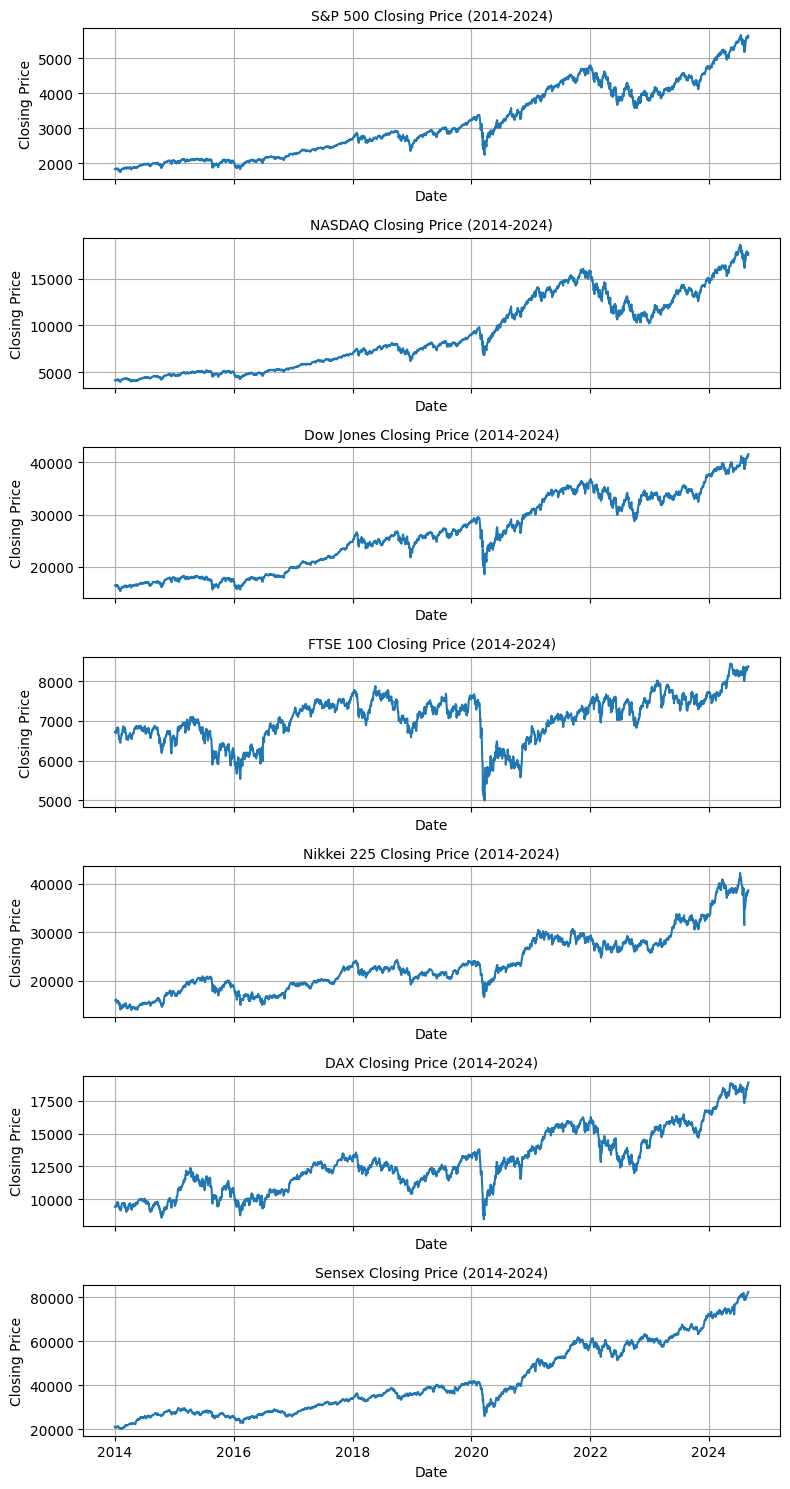

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define ticker symbols for the indices
indices = {
    "S&P 500": "^GSPC",
    "NASDAQ": "^IXIC",
    "Dow Jones": "^DJI",
    "FTSE 100": "^FTSE",
    "Nikkei 225": "^N225",
    "DAX": "^GDAXI",
    "Sensex": "^BSESN"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data for closing prices
closing_price_data = {}

# Fetch and store daily closing prices for each index
for name, ticker in indices.items():
    # Fetch the last 10 years of data from Yahoo Finance
    data = yf.download(ticker, start="2014-01-01", end=today)

    # Store the daily closing price data in the dictionary
    closing_price_data[name] = data['Close']

# Create subplots: one subplot per index in a vertical column
fig, axes = plt.subplots(len(closing_price_data), 1, figsize=(8, 15), sharex=True)

# Plot each index in its respective subplot
for ax, (name, data) in zip(axes, closing_price_data.items()):
    ax.plot(data.index, data, label=name)
    ax.set_title(f'{name} Closing Price (2014-2024)', fontsize=10)  # Smaller font size for title
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.grid(True)

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


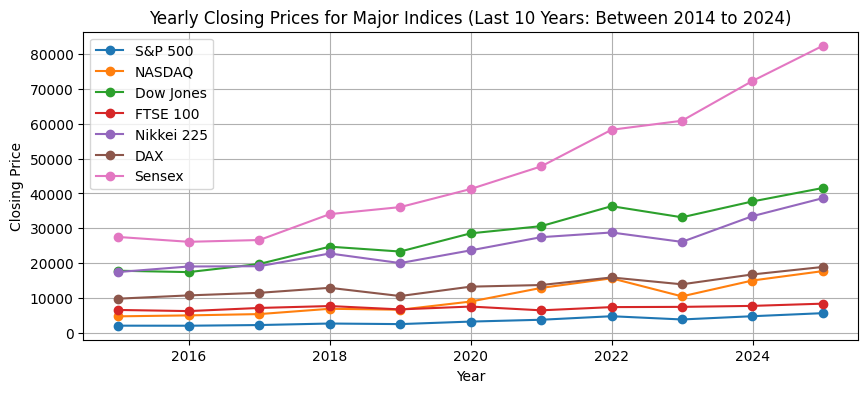

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define ticker symbols for the indices
indices = {
    "S&P 500": "^GSPC",
    "NASDAQ": "^IXIC",
    "Dow Jones": "^DJI",
    "FTSE 100": "^FTSE",
    "Nikkei 225": "^N225",
    "DAX": "^GDAXI",
    "Sensex": "^BSESN"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data for closing prices
closing_price_data = {}

# Fetch and store closing prices for each index
for name, ticker in indices.items():
    # Fetch the last 10 years of data from Yahoo Finance
    data = yf.download(ticker, start="2014-01-01", end=today)

    # Resample the data to get the last closing price of each year
    yearly_closing_data = data['Close'].resample('Y').last()

    # Store the data in the dictionary
    closing_price_data[name] = yearly_closing_data

# Plotting the line chart for closing prices for all indices
plt.figure(figsize=(10, 4))

for name, data in closing_price_data.items():
    plt.plot(data.index, data, marker='o', label=name)

plt.title('Yearly Closing Prices for Major Indices (Last 10 Years: Between 2014 to 2024)')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Overall Average Growth for Each Index (Last 10 Years: Between 2014 to 2024): S&P 500: 11.91%, NASDAQ: 16.55%, Dow Jones: 9.34%


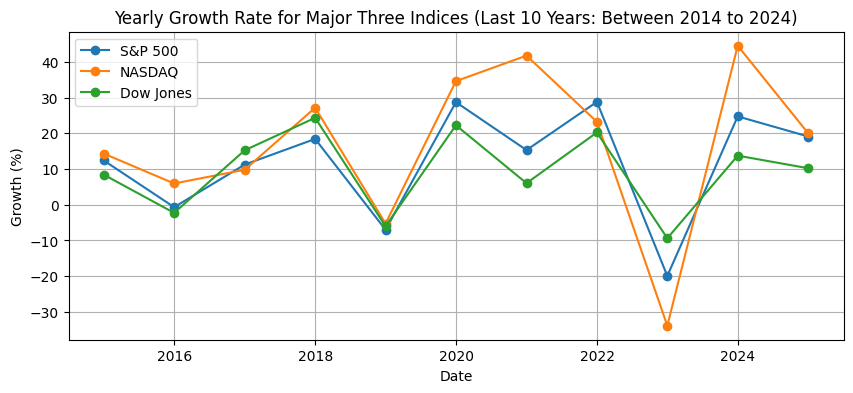

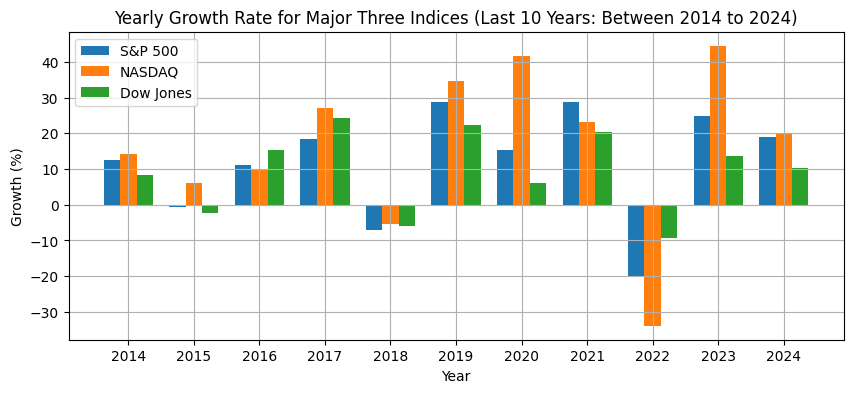

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define ticker symbols for the indices
indices = {
    "S&P 500": "^GSPC",
    "NASDAQ": "^IXIC",
    "Dow Jones": "^DJI"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data and average growth
growth_data = {}
average_growth = {}

# Fetch and calculate yearly growth for each index
for name, ticker in indices.items():
    # Fetch the last 5 years of data from Yahoo Finance
    data = yf.download(ticker, start="2014-01-01", end=today)

    # Resample the data to get the first and last day of each year
    yearly_data = data.resample('Y').agg({'Close': ['first', 'last']})

    # Calculate the percentage growth for each year
    yearly_data['Growth (%)'] = (yearly_data['Close']['last'] - yearly_data['Close']['first']) / yearly_data['Close']['first'] * 100

    # Reset index to have date as a column
    yearly_data = yearly_data.reset_index()

    # Store the data in the dictionary
    growth_data[name] = yearly_data[['Date', 'Growth (%)']]

    # Calculate the average growth for each index and store it
    average_growth[name] = yearly_data['Growth (%)'].mean()

# Print the overall average growth for all indices in a single line
average_growth_str = ", ".join([f"{name}: {avg_growth:.2f}%" for name, avg_growth in average_growth.items()])
print(f"Overall Average Growth for Each Index (Last 10 Years: Between 2014 to 2024): {average_growth_str}")

# Plotting the line chart for yearly growth percentage for all indices
plt.figure(figsize=(10, 4))

for name, data in growth_data.items():
    plt.plot(data['Date'], data['Growth (%)'], marker='o', label=name)

plt.title('Yearly Growth Rate for Major Three Indices (Last 10 Years: Between 2014 to 2024)')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the bar chart for yearly growth percentage for all indices
plt.figure(figsize=(10, 4))

bar_width = 0.25  # Bar width for better spacing
years = growth_data['S&P 500']['Date']

# Bar positions
bar_positions = {name: [i + idx * bar_width for i in range(len(years))] for idx, name in enumerate(growth_data)}

for idx, (name, data) in enumerate(growth_data.items()):
    plt.bar(bar_positions[name], data['Growth (%)'], width=bar_width, label=name)

plt.xticks([r + bar_width for r in range(len(years))], years.dt.year)
plt.title('Yearly Growth Rate for Major Three Indices (Last 10 Years: Between 2014 to 2024)')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Overall Average Growth for Each Index (Last 10 Years: Between 2014 to 2024): FTSE 100: 2.26%, Nikkei 225: 9.46%, DAX: 7.41%, Sensex: 13.56%


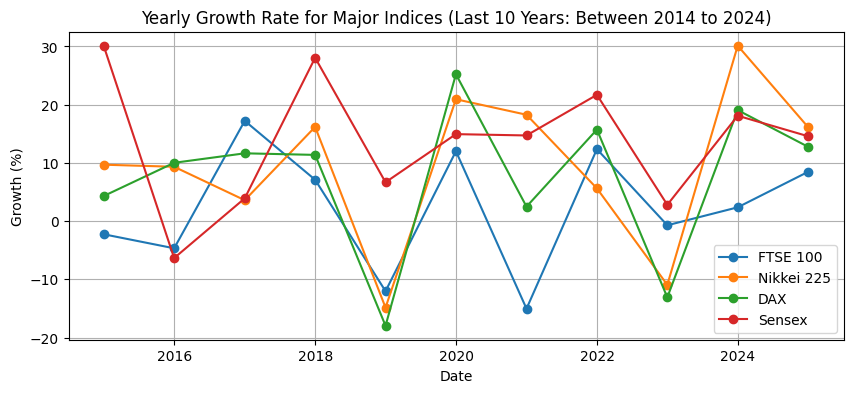

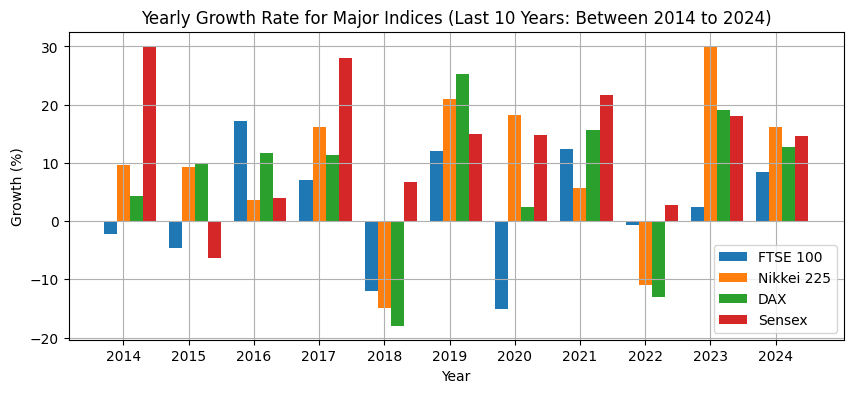

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define ticker symbols for the indices
indices = {
    "FTSE 100": "^FTSE",
    "Nikkei 225": "^N225",
    "DAX": "^GDAXI",
    "Sensex": "^BSESN"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data and average growth
growth_data = {}
average_growth = {}

# Fetch and calculate yearly growth for each index
for name, ticker in indices.items():
    # Fetch the last 10 years of data from Yahoo Finance
    data = yf.download(ticker, start="2014-01-01", end=today)

    # Resample the data to get the first and last day of each year
    yearly_data = data.resample('Y').agg({'Close': ['first', 'last']})

    # Calculate the percentage growth for each year
    yearly_data['Growth (%)'] = (yearly_data['Close']['last'] - yearly_data['Close']['first']) / yearly_data['Close']['first'] * 100

    # Reset index to have date as a column
    yearly_data = yearly_data.reset_index()

    # Store the data in the dictionary
    growth_data[name] = yearly_data[['Date', 'Growth (%)']]

    # Calculate the average growth for each index and store it
    average_growth[name] = yearly_data['Growth (%)'].mean()

# Print the overall average growth for all indices in a single line
average_growth_str = ", ".join([f"{name}: {avg_growth:.2f}%" for name, avg_growth in average_growth.items()])
print(f"Overall Average Growth for Each Index (Last 10 Years: Between 2014 to 2024): {average_growth_str}")

# Plotting the line chart for yearly growth percentage for all indices
plt.figure(figsize=(10, 4))

for name, data in growth_data.items():
    plt.plot(data['Date'], data['Growth (%)'], marker='o', label=name)

plt.title('Yearly Growth Rate for Major Indices (Last 10 Years: Between 2014 to 2024)')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the bar chart for yearly growth percentage for all indices
plt.figure(figsize=(10, 4))

bar_width = 0.2  # Bar width for better spacing
years = growth_data['FTSE 100']['Date']  # Use any index to get the years since they all have the same date range

# Bar positions
bar_positions = {name: [i + idx * bar_width for i in range(len(years))] for idx, name in enumerate(growth_data)}

for idx, (name, data) in enumerate(growth_data.items()):
    plt.bar(bar_positions[name], data['Growth (%)'], width=bar_width, label=name)

plt.xticks([r + bar_width for r in range(len(years))], years.dt.year)
plt.title('Yearly Growth Rate for Major Indices (Last 10 Years: Between 2014 to 2024)')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
data.tail(5)

,Date,Growth (%)
,,
2,2020-12-31,6.019231
3,2021-12-31,20.230387
4,2022-12-31,-9.396756
5,2023-12-31,13.740696
6,2024-12-31,10.202930


[*********************100%***********************]  1 of 1 completed


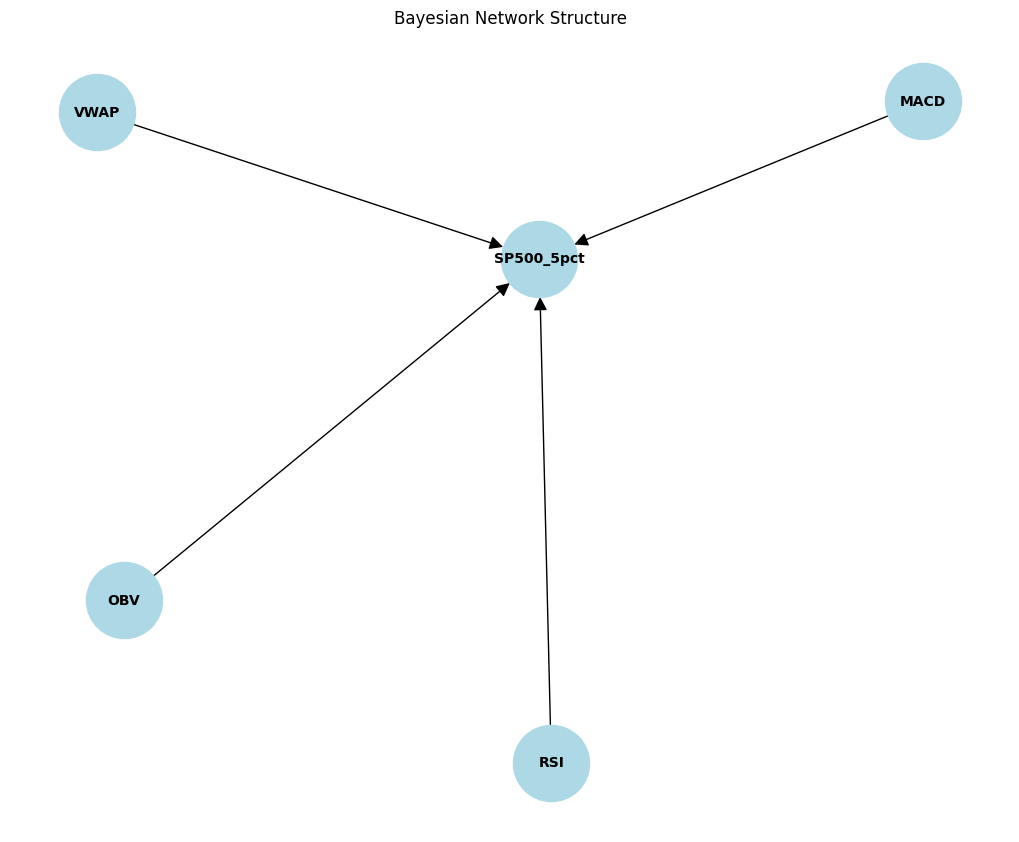


Marginal CPD for RSI:

P(RSI = Oversold) = 0.0149
P(RSI = Neutral) = 0.9089
P(RSI = Overbought) = 0.0762

Marginal CPD for MACD:

P(MACD = Bearish) = 0.4706
P(MACD = Bullish) = 0.5294

Marginal CPD for VWAP:

P(VWAP = Below) = 0.5004
P(VWAP = Above) = 0.4996

Marginal CPD for OBV:

P(OBV = Decreasing) = 0.0465
P(OBV = Increasing) = 0.9535

Conditional CPD for SP500_5pct given ['OBV', 'VWAP', 'MACD', 'RSI']:

OBV=Increase, VWAP=Oversold, MACD=Bearish, RSI=Below -> P(Increase) = 0.7582, P(Decrease) = 0.2418
OBV=Increase, VWAP=Neutral, MACD=Bearish, RSI=Below -> P(Increase) = 0.5619, P(Decrease) = 0.4381
OBV=Increase, VWAP=Overbought, MACD=Bearish, RSI=Below -> P(Increase) = 0.6877, P(Decrease) = 0.3123
OBV=Decrease, VWAP=Oversold, MACD=Bearish, RSI=Below -> P(Increase) = 0.8030, P(Decrease) = 0.1970
OBV=Decrease, VWAP=Neutral, MACD=Bearish, RSI=Below -> P(Increase) = 0.0808, P(Decrease) = 0.9192
OBV=Decrease, VWAP=Overbought, MACD=Bearish, RSI=Below -> P(Increase) = 0.3733, P(Decrease) 

0it [00:00, ?it/s]

0it [00:00, ?it/s]


Predicted probability of 5% S&P 500 growth in the next 15 days: {'SP500_5pct': 'Increase'}


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from datetime import datetime
import ta  # Import the technical analysis library

# Step 1: Fetch data from Yahoo Finance
def fetch_data(index_ticker='^GSPC', start='2020-01-01'):
    end = datetime.today().strftime('%Y-%m-%d')
    index_data = yf.download(index_ticker, start=start, end=end)  # Fetch S&P 500 data
    return index_data

# Step 2: Calculate Technical Indicators using ta library
def calculate_technical_indicators(data):
    # RSI (Relative Strength Index)
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()

    # MACD (Moving Average Convergence Divergence)
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_signal'] = macd.macd_signal()
    data['MACD_diff'] = macd.macd_diff()

    # VWAP (Volume Weighted Average Price)
    data['VWAP'] = ta.volume.VolumeWeightedAveragePrice(
        high=data['High'], low=data['Low'], close=data['Close'], volume=data['Volume']
    ).volume_weighted_average_price()

    # OBV (On-Balance Volume)
    data['OBV'] = ta.volume.OnBalanceVolumeIndicator(
        close=data['Close'], volume=data['Volume']
    ).on_balance_volume()

    data.dropna(inplace=True)
    return data

# Step 3: Calculate probabilities based on historical data
def calculate_probabilities(data, column, bins):
    # Bin the data into categories and calculate the frequency of each bin
    binned_data = pd.cut(data[column], bins=bins, labels=False)
    counts = binned_data.value_counts().sort_index()

    # Convert frequencies to probabilities
    probabilities = counts / counts.sum()

    return probabilities.values

def create_cpds_from_data(sp500_data):
    # Calculate probabilities for RSI
    rsi_bins = [0, 30, 70, 100]  # Oversold, Neutral, Overbought
    rsi_probs = calculate_probabilities(sp500_data, 'RSI', rsi_bins).reshape(3, 1)  # Reshape to (3, 1)

    # Calculate probabilities for MACD
    macd_probs = calculate_probabilities(sp500_data, 'MACD_diff', bins=[-np.inf, 0, np.inf]).reshape(2, 1)  # Reshape to (2, 1)

    # Calculate probabilities for VWAP
    vwap_probs = calculate_probabilities(sp500_data, 'VWAP', bins=[-np.inf, sp500_data['Close'].mean(), np.inf]).reshape(2, 1)  # Reshape to (2, 1)

    # Calculate probabilities for OBV
    obv_probs = calculate_probabilities(sp500_data, 'OBV', bins=[-np.inf, 0, np.inf]).reshape(2, 1)  # Reshape to (2, 1)

    cpd_rsi = TabularCPD(variable='RSI', variable_card=3, values=rsi_probs, state_names={'RSI': ['Oversold', 'Neutral', 'Overbought']})
    cpd_macd = TabularCPD(variable='MACD', variable_card=2, values=macd_probs, state_names={'MACD': ['Bearish', 'Bullish']})
    cpd_vwap = TabularCPD(variable='VWAP', variable_card=2, values=vwap_probs, state_names={'VWAP': ['Below', 'Above']})
    cpd_obv = TabularCPD(variable='OBV', variable_card=2, values=obv_probs, state_names={'OBV': ['Decreasing', 'Increasing']})

    # Conditional probability of 5% S&P 500 growth in next 15 days given the parents
    values = np.random.rand(2, 24)
    values = values / values.sum(axis=0)  # Normalize to sum to 1 along each column

    cpd_sp500_5pct = TabularCPD(
        variable='SP500_5pct', variable_card=2,
        values=values,
        evidence=['RSI', 'MACD', 'VWAP', 'OBV'],
        evidence_card=[3, 2, 2, 2],
        state_names={
            'SP500_5pct': ['Increase', 'Decrease'],
            'RSI': ['Oversold', 'Neutral', 'Overbought'],
            'MACD': ['Bearish', 'Bullish'],
            'VWAP': ['Below', 'Above'],
            'OBV': ['Decreasing', 'Increasing']
        }
    )

    return [cpd_rsi, cpd_macd, cpd_vwap, cpd_obv, cpd_sp500_5pct]

# Step 4: Construct a Bayesian Network with separate nodes for each indicator
def construct_bayesian_network():
    model = BayesianNetwork([
        ('RSI', 'SP500_5pct'),
        ('MACD', 'SP500_5pct'),
        ('VWAP', 'SP500_5pct'),
        ('OBV', 'SP500_5pct')
    ])
    return model

# Step 5: Visualize the Bayesian Network using NetworkX
def visualize_bayesian_network(model):
    # Create a directed graph
    G = nx.DiGraph()
    G.add_edges_from(model.edges())

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Bayesian Network Structure")
    plt.show()

# Step 6: Prepare data for Bayesian Network
def prepare_data_for_bn(sp500_data):
    dataset = pd.DataFrame()

    # Calculate the 15-day future return
    sp500_data['15d_return'] = sp500_data['Close'].pct_change(periods=15).shift(-15)
    dataset['SP500_5pct'] = sp500_data['15d_return'].apply(lambda x: 'Increase' if x >= 0.05 else 'Decrease')

    # Convert technical indicators to categorical data for Bayesian Network
    dataset['RSI'] = sp500_data['RSI'].apply(lambda x: 'Overbought' if x > 70 else ('Oversold' if x < 30 else 'Neutral'))
    dataset['MACD'] = sp500_data['MACD_diff'].apply(lambda x: 'Bullish' if x > 0 else 'Bearish')
    dataset['VWAP'] = sp500_data['VWAP'].apply(lambda x: 'Above' if x > sp500_data['Close'].mean() else 'Below')
    dataset['OBV'] = sp500_data['OBV'].apply(lambda x: 'Increasing' if x > 0 else 'Decreasing')

    dataset.dropna(inplace=True)
    return dataset

# Step 7: Display CPTs
def display_cpds(cpds):
    for cpd in cpds:
        # Check if CPD is marginal or conditional
        if cpd.get_evidence():
            print(f"\nConditional CPD for {cpd.variable} given {cpd.get_evidence()}:\n")
            evidence_combinations = pd.DataFrame(list(np.array(np.meshgrid(*cpd.state_names.values())).T.reshape(-1, len(cpd.state_names))))
            for i, (combo, prob) in enumerate(zip(evidence_combinations.values, cpd.get_values().T)):
                combo_str = ', '.join([f"{parent}={state}" for parent, state in zip(cpd.get_evidence(), combo)])
                print(f"{combo_str} -> P(Increase) = {prob[0]:.4f}, P(Decrease) = {prob[1]:.4f}")
        else:
            print(f"\nMarginal CPD for {cpd.variable}:\n")
            for state, prob in zip(cpd.state_names[cpd.variable], cpd.get_values().flatten()):
                print(f"P({cpd.variable} = {state}) = {prob:.4f}")

# Step 8: Train the Bayesian Network
def train_bayesian_network(model, data, cpds):
    for cpd in cpds:
        model.add_cpds(cpd)
    assert model.check_model(), "The model structure or CPDs are incorrect!"
    return model

# Step 9: Perform Inference
def perform_inference(model):
    inference = VariableElimination(model)
    query = inference.map_query(variables=['SP500_5pct'], evidence={'RSI': 'Neutral', 'MACD': 'Bullish', 'VWAP': 'Above', 'OBV': 'Increasing'})
    return query

if __name__ == "__main__":
    # Fetch data
    sp500_data = fetch_data()

    # Calculate technical indicators
    sp500_data = calculate_technical_indicators(sp500_data)

    # Construct Bayesian Network
    model = construct_bayesian_network()

    # Visualize Bayesian Network
    visualize_bayesian_network(model)

    # Prepare data
    dataset = prepare_data_for_bn(sp500_data)

    # Create CPDs from actual data
    cpds_from_data = create_cpds_from_data(sp500_data)

    # Display CPDs
    display_cpds(cpds_from_data)

    # Train the model
    trained_model = train_bayesian_network(model, dataset, cpds_from_data)

    # Perform inference
    prediction = perform_inference(trained_model)
    print("\nPredicted probability of 5% S&P 500 growth in the next 15 days:", prediction)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


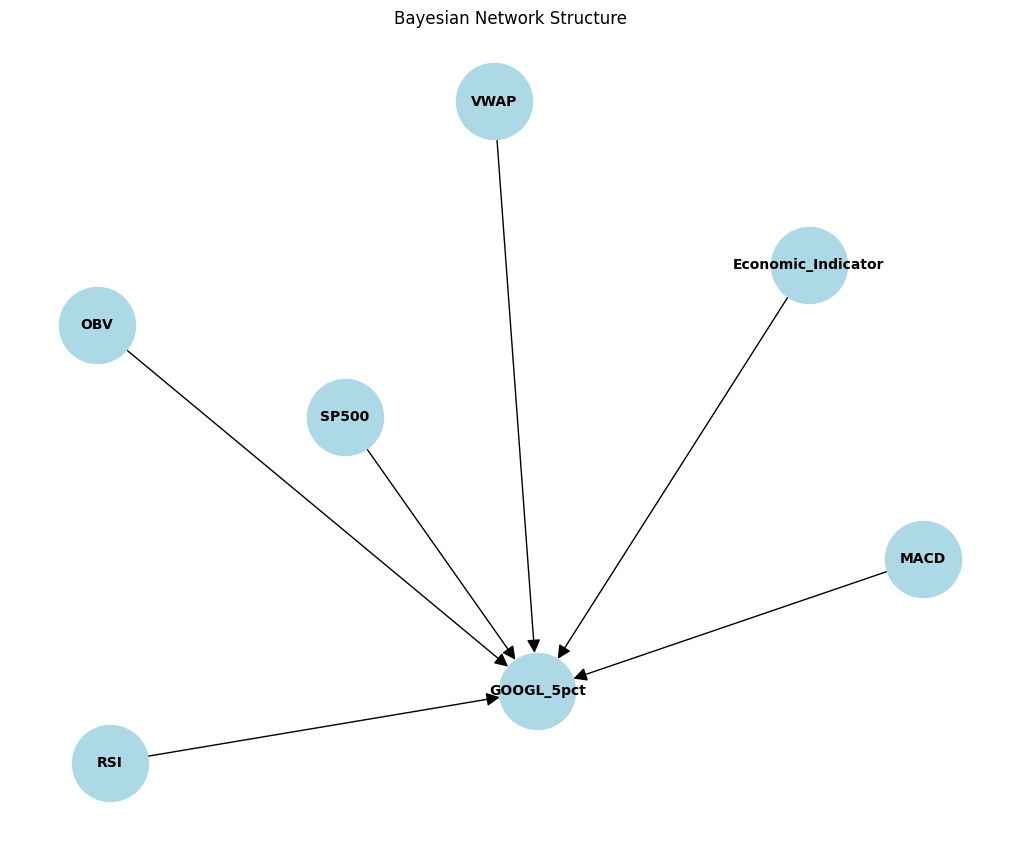


CPD for RSI:
 +-----------------+-----------+
| RSI(Oversold)   | 0.0122699 |
+-----------------+-----------+
| RSI(Neutral)    | 0.922875  |
+-----------------+-----------+
| RSI(Overbought) | 0.0648554 |
+-----------------+-----------+

CPD for MACD:
 +---------------+----------+
| MACD(Bearish) | 0.502191 |
+---------------+----------+
| MACD(Bullish) | 0.497809 |
+---------------+----------+

CPD for VWAP:
 +-------------+----------+
| VWAP(Below) | 0.503067 |
+-------------+----------+
| VWAP(Above) | 0.496933 |
+-------------+----------+

CPD for OBV:
 +-----------------+-------------+
| OBV(Decreasing) | 0.000876424 |
+-----------------+-------------+
| OBV(Increasing) | 0.999124    |
+-----------------+-------------+

CPD for GOOGL_5pct:
 +----------------------+-----+-------------------------+
| SP500                | ... | SP500(Decrease)         |
+----------------------+-----+-------------------------+
| Economic_Indicator   | ... | Economic_Indicator(Bad) |
+-------------

ValueError: No CPD associated with SP500

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from datetime import datetime
import ta  # Import the technical analysis library

# Step 1: Fetch data from Yahoo Finance
def fetch_data(ticker='GOOGL', index_ticker='^GSPC', start='2020-01-01'):
    end = datetime.today().strftime('%Y-%m-%d')
    stock_data = yf.download(ticker, start=start, end=end)
    index_data = yf.download(index_ticker, start=start, end=end)  # Fetch S&P 500 data
    return stock_data, index_data

# Step 2: Calculate Technical Indicators using ta library
def calculate_technical_indicators(data):
    # RSI (Relative Strength Index)
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()

    # MACD (Moving Average Convergence Divergence)
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_signal'] = macd.macd_signal()
    data['MACD_diff'] = macd.macd_diff()

    # VWAP (Volume Weighted Average Price)
    data['VWAP'] = ta.volume.VolumeWeightedAveragePrice(
        high=data['High'], low=data['Low'], close=data['Close'], volume=data['Volume']
    ).volume_weighted_average_price()

    # OBV (On-Balance Volume)
    data['OBV'] = ta.volume.OnBalanceVolumeIndicator(
        close=data['Close'], volume=data['Volume']
    ).on_balance_volume()

    data.dropna(inplace=True)
    return data

# Step 2.1: Calculate Technical Indicators for the S&P 500 Index
def calculate_index_indicators(index_data):
    # RSI (Relative Strength Index) for S&P 500
    index_data['RSI'] = ta.momentum.RSIIndicator(close=index_data['Close'], window=14).rsi()

    # MACD (Moving Average Convergence Divergence) for S&P 500
    macd = ta.trend.MACD(close=index_data['Close'])
    index_data['MACD'] = macd.macd()
    index_data['MACD_signal'] = macd.macd_signal()
    index_data['MACD_diff'] = macd.macd_diff()

    # VWAP (Volume Weighted Average Price) for S&P 500
    index_data['VWAP'] = ta.volume.VolumeWeightedAveragePrice(
        high=index_data['High'], low=index_data['Low'], close=index_data['Close'], volume=index_data['Volume']
    ).volume_weighted_average_price()

    # OBV (On-Balance Volume) for S&P 500
    index_data['OBV'] = ta.volume.OnBalanceVolumeIndicator(
        close=index_data['Close'], volume=index_data['Volume']
    ).on_balance_volume()

    index_data.dropna(inplace=True)
    return index_data

# Step 3: Calculate probabilities based on historical data
def calculate_probabilities(data, column, bins):
    # Bin the data into categories and calculate the frequency of each bin
    binned_data = pd.cut(data[column], bins=bins, labels=False)
    counts = binned_data.value_counts().sort_index()

    # Convert frequencies to probabilities
    probabilities = counts / counts.sum()

    return probabilities.values

def create_cpds_from_data(googl_data):
    # Calculate probabilities for RSI
    rsi_bins = [0, 30, 70, 100]  # Oversold, Neutral, Overbought
    rsi_probs = calculate_probabilities(googl_data, 'RSI', rsi_bins).reshape(3, 1)  # Reshape to (3, 1)

    # Calculate probabilities for MACD
    macd_probs = calculate_probabilities(googl_data, 'MACD_diff', bins=[-np.inf, 0, np.inf]).reshape(2, 1)  # Reshape to (2, 1)

    # Calculate probabilities for VWAP
    vwap_probs = calculate_probabilities(googl_data, 'VWAP', bins=[-np.inf, googl_data['Close'].mean(), np.inf]).reshape(2, 1)  # Reshape to (2, 1)

    # Calculate probabilities for OBV
    obv_probs = calculate_probabilities(googl_data, 'OBV', bins=[-np.inf, 0, np.inf]).reshape(2, 1)  # Reshape to (2, 1)

    cpd_rsi = TabularCPD(variable='RSI', variable_card=3, values=rsi_probs, state_names={'RSI': ['Oversold', 'Neutral', 'Overbought']})
    cpd_macd = TabularCPD(variable='MACD', variable_card=2, values=macd_probs, state_names={'MACD': ['Bearish', 'Bullish']})
    cpd_vwap = TabularCPD(variable='VWAP', variable_card=2, values=vwap_probs, state_names={'VWAP': ['Below', 'Above']})
    cpd_obv = TabularCPD(variable='OBV', variable_card=2, values=obv_probs, state_names={'OBV': ['Decreasing', 'Increasing']})

    # Conditional probability of 5% Google stock growth in next 15 days given the parents
    values = np.random.rand(2, 96)
    values = values / values.sum(axis=0)  # Normalize to sum to 1 along each column

    cpd_googl_5pct = TabularCPD(
        variable='GOOGL_5pct', variable_card=2,
        values=values,
        evidence=['SP500', 'Economic_Indicator', 'RSI', 'MACD', 'VWAP', 'OBV'],
        evidence_card=[2, 2, 3, 2, 2, 2],
        state_names={
            'GOOGL_5pct': ['Increase', 'Decrease'],
            'SP500': ['Increase', 'Decrease'],
            'Economic_Indicator': ['Good', 'Bad'],
            'RSI': ['Oversold', 'Neutral', 'Overbought'],
            'MACD': ['Bearish', 'Bullish'],
            'VWAP': ['Below', 'Above'],
            'OBV': ['Decreasing', 'Increasing']
        }
    )

    return [cpd_rsi, cpd_macd, cpd_vwap, cpd_obv, cpd_googl_5pct]

# Step 4: Construct a Bayesian Network with separate nodes for each indicator
def construct_bayesian_network():
    model = BayesianNetwork([
        ('SP500', 'GOOGL_5pct'),
        ('Economic_Indicator', 'GOOGL_5pct'),
        ('RSI', 'GOOGL_5pct'),
        ('MACD', 'GOOGL_5pct'),
        ('VWAP', 'GOOGL_5pct'),
        ('OBV', 'GOOGL_5pct')
    ])
    return model

# Step 5: Visualize the Bayesian Network using NetworkX
def visualize_bayesian_network(model):
    # Create a directed graph
    G = nx.DiGraph()
    G.add_edges_from(model.edges())

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Bayesian Network Structure")
    plt.show()

# Step 6: Prepare data for Bayesian Network
def prepare_data_for_bn(googl_data, sp500_data):
    dataset = pd.DataFrame()

    # Calculate the 15-day future return
    googl_data['15d_return'] = googl_data['Close'].pct_change(periods=15).shift(-15)
    dataset['GOOGL_5pct'] = googl_data['15d_return'].apply(lambda x: 'Increase' if x >= 0.05 else 'Decrease')

    dataset['SP500'] = sp500_data['Close'].pct_change().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
    dataset['Economic_Indicator'] = np.random.choice(['Good', 'Bad'], size=len(dataset))  # Placeholder for actual data

    # Convert technical indicators to categorical data for Bayesian Network
    dataset['RSI'] = googl_data['RSI'].apply(lambda x: 'Overbought' if x > 70 else ('Oversold' if x < 30 else 'Neutral'))
    dataset['MACD'] = googl_data['MACD_diff'].apply(lambda x: 'Bullish' if x > 0 else 'Bearish')
    dataset['VWAP'] = googl_data['VWAP'].apply(lambda x: 'Above' if x > googl_data['Close'].mean() else 'Below')
    dataset['OBV'] = googl_data['OBV'].apply(lambda x: 'Increasing' if x > 0 else 'Decreasing')

    dataset.dropna(inplace=True)
    return dataset

# Step 7: Display CPTs
def display_cpds(cpds):
    for cpd in cpds:
        print(f"\nCPD for {cpd.variable}:\n", cpd)

# Step 8: Train the Bayesian Network
def train_bayesian_network(model, data, cpds):
    for cpd in cpds:
        model.add_cpds(cpd)
    assert model.check_model(), "The model structure or CPDs are incorrect!"
    return model

# Step 9: Perform Inference
def perform_inference(model):
    inference = VariableElimination(model)
    query = inference.map_query(variables=['GOOGL_5pct'], evidence={'SP500': 'Increase', 'Economic_Indicator': 'Good'})
    return query

if __name__ == "__main__":
    # Fetch data
    googl_data, sp500_data = fetch_data()

    # Calculate technical indicators
    googl_data = calculate_technical_indicators(googl_data)
    sp500_data = calculate_index_indicators(sp500_data)  # Calculate indicators for S&P 500

    # Construct Bayesian Network
    model = construct_bayesian_network()

    # Visualize Bayesian Network
    visualize_bayesian_network(model)

    # Prepare data
    dataset = prepare_data_for_bn(googl_data, sp500_data)

    # Create CPDs from actual data
    cpds_from_data = create_cpds_from_data(googl_data)

    # Display CPDs
    display_cpds(cpds_from_data)

    # Train the model
    trained_model = train_bayesian_network(model, dataset, cpds_from_data)

    # Perform inference
    prediction = perform_inference(trained_model)
    print("\nPredicted probability of 5% Google stock growth in the next 15 days:", prediction)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from datetime import datetime
import ta  # Import the technical analysis library

# Indices tickers
indices = {
    "FTSE 100": "^FTSE",
    "Nikkei 225": "^N225",
    "DAX": "^GDAXI",
    "Sensex": "^BSESN"
}

# Step 1: Fetch data from Yahoo Finance
def fetch_data(ticker, start='2020-01-01'):
    end = datetime.today().strftime('%Y-%m-%d')
    data = yf.download(ticker, start=start, end=end)
    return data

# Step 2: Calculate Technical Indicators using ta library
def calculate_technical_indicators(data):
    # RSI (Relative Strength Index)
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()

    # MACD (Moving Average Convergence Divergence)
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_signal'] = macd.macd_signal()
    data['MACD_diff'] = macd.macd_diff()

    # VWAP (Volume Weighted Average Price)
    data['VWAP'] = ta.volume.VolumeWeightedAveragePrice(
        high=data['High'], low=data['Low'], close=data['Close'], volume=data['Volume']
    ).volume_weighted_average_price()

    # OBV (On-Balance Volume)
    data['OBV'] = ta.volume.OnBalanceVolumeIndicator(
        close=data['Close'], volume=data['Volume']
    ).on_balance_volume()

    data.dropna(inplace=True)
    return data

# Step 3: Calculate probabilities based on historical data
def calculate_probabilities(data, column, bins):
    binned_data = pd.cut(data[column], bins=bins, labels=False)
    counts = binned_data.value_counts().sort_index()
    probabilities = counts / counts.sum()
    return probabilities.values

def create_cpds_from_data(data):
    # Calculate probabilities for RSI
    rsi_bins = [0, 30, 70, 100]  # Oversold, Neutral, Overbought
    rsi_probs = calculate_probabilities(data, 'RSI', rsi_bins).reshape(3, 1)

    # Calculate probabilities for MACD
    macd_probs = calculate_probabilities(data, 'MACD_diff', bins=[-np.inf, 0, np.inf]).reshape(2, 1)

    # Calculate probabilities for VWAP
    vwap_probs = calculate_probabilities(data, 'VWAP', bins=[-np.inf, data['Close'].mean(), np.inf]).reshape(2, 1)

    # Calculate probabilities for OBV
    obv_probs = calculate_probabilities(data, 'OBV', bins=[-np.inf, 0, np.inf]).reshape(2, 1)

    cpd_rsi = TabularCPD(variable='RSI', variable_card=3, values=rsi_probs, state_names={'RSI': ['Oversold', 'Neutral', 'Overbought']})
    cpd_macd = TabularCPD(variable='MACD', variable_card=2, values=macd_probs, state_names={'MACD': ['Bearish', 'Bullish']})
    cpd_vwap = TabularCPD(variable='VWAP', variable_card=2, values=vwap_probs, state_names={'VWAP': ['Below', 'Above']})
    cpd_obv = TabularCPD(variable='OBV', variable_card=2, values=obv_probs, state_names={'OBV': ['Decreasing', 'Increasing']})

    # Calculate the CPD for Growth based on combinations of RSI, MACD, VWAP, and OBV
    growth_data = pd.DataFrame()
    growth_data['RSI'] = pd.cut(data['RSI'], bins=rsi_bins, labels=['Oversold', 'Neutral', 'Overbought'])
    growth_data['MACD'] = pd.cut(data['MACD_diff'], bins=[-np.inf, 0, np.inf], labels=['Bearish', 'Bullish'])
    growth_data['VWAP'] = pd.cut(data['VWAP'], bins=[-np.inf, data['Close'].mean(), np.inf], labels=['Below', 'Above'])
    growth_data['OBV'] = pd.cut(data['OBV'], bins=[-np.inf, 0, np.inf], labels=['Decreasing', 'Increasing'])
    growth_data['Growth'] = data['15d_return'].apply(lambda x: 'Increase' if x >= 0.05 else 'Decrease')

    # Fill in missing combinations with zeros, then normalize to sum to 1
    combinations = pd.MultiIndex.from_product([['Oversold', 'Neutral', 'Overbought'], ['Bearish', 'Bullish'],
                                               ['Below', 'Above'], ['Decreasing', 'Increasing']],
                                              names=['RSI', 'MACD', 'VWAP', 'OBV'])
    growth_cpd_values = growth_data.groupby(['RSI', 'MACD', 'VWAP', 'OBV', 'Growth']).size().unstack(fill_value=0)
    growth_cpd_values = growth_cpd_values.reindex(combinations).fillna(0)
    growth_cpd_values = growth_cpd_values.div(growth_cpd_values.sum(axis=1), axis=0).fillna(0).T.values

    cpd_growth = TabularCPD(
        variable='Growth', variable_card=2,
        values=growth_cpd_values,
        evidence=['RSI', 'MACD', 'VWAP', 'OBV'],
        evidence_card=[3, 2, 2, 2],
        state_names={
            'Growth': ['Increase', 'Decrease'],
            'RSI': ['Oversold', 'Neutral', 'Overbought'],
            'MACD': ['Bearish', 'Bullish'],
            'VWAP': ['Below', 'Above'],
            'OBV': ['Decreasing', 'Increasing']
        }
    )

    return [cpd_rsi, cpd_macd, cpd_vwap, cpd_obv, cpd_growth]

# Step 4: Construct a Bayesian Network with separate nodes for each indicator
def construct_bayesian_network():
    model = BayesianNetwork([
        ('RSI', 'Growth'),
        ('MACD', 'Growth'),
        ('VWAP', 'Growth'),
        ('OBV', 'Growth')
    ])
    return model

# Step 5: Prepare data for Bayesian Network
def prepare_data_for_bn(data):
    dataset = pd.DataFrame()
    data['15d_return'] = data['Close'].pct_change(periods=15).shift(-15)
    dataset['Growth'] = data['15d_return'].apply(lambda x: 'Increase' if x >= 0.05 else 'Decrease')
    dataset['RSI'] = data['RSI'].apply(lambda x: 'Overbought' if x > 70 else ('Oversold' if x < 30 else 'Neutral'))
    dataset['MACD'] = data['MACD_diff'].apply(lambda x: 'Bullish' if x > 0 else 'Bearish')
    dataset['VWAP'] = data['VWAP'].apply(lambda x: 'Above' if x > data['Close'].mean() else 'Below')
    dataset['OBV'] = data['OBV'].apply(lambda x: 'Increasing' if x > 0 else 'Decreasing')
    dataset.dropna(inplace=True)
    return dataset

# Step 6: Display CPTs in a readable format
def display_cpds(cpds):
    for cpd in cpds:
        print(f"\nCPD for {cpd.variable}:")
        cpd_str = cpd.__str__()
        print(cpd_str)

# Step 7: Train the Bayesian Network
def train_bayesian_network(model, data, cpds):
    for cpd in cpds:
        model.add_cpds(cpd)
    assert model.check_model(), "The model structure or CPDs are incorrect!"
    return model

# Step 8: Perform Inference
def perform_inference(model):
    inference = VariableElimination(model)
    query = inference.map_query(variables=['Growth'], evidence={'RSI': 'Neutral', 'MACD': 'Bullish'})
    return query

if __name__ == "__main__":
    index_results = {}

    for name, ticker in indices.items():
        print(f"Processing index: {name} ({ticker})")

        # Fetch data
        index_data = fetch_data(ticker)

        # Calculate technical indicators
        index_data = calculate_technical_indicators(index_data)

        # Prepare data
        dataset = prepare_data_for_bn(index_data)

        # Construct Bayesian Network
        model = construct_bayesian_network()

        # Create CPDs from actual data
        cpds_from_data = create_cpds_from_data(index_data)

        # Display CPDs
        display_cpds(cpds_from_data)

        # Train the model
        trained_model = train_bayesian_network(model, dataset, cpds_from_data)

        # Perform inference
        prediction = perform_inference(trained_model)
        print(f"\nPredicted probability of 5% growth for {name} in the next 15 days:", prediction)

        # Store results
        index_results[name] = prediction

    print("\nAll index predictions:", index_results)


[*********************100%***********************]  1 of 1 completed

Processing index: FTSE 100 (^FTSE)

CPD for RSI:
+-----------------+-----------+
| RSI(Oversold)   | 0.0279965 |
+-----------------+-----------+
| RSI(Neutral)    | 0.926509  |
+-----------------+-----------+
| RSI(Overbought) | 0.0454943 |
+-----------------+-----------+

CPD for MACD:
+---------------+----------+
| MACD(Bearish) | 0.478565 |
+---------------+----------+
| MACD(Bullish) | 0.521435 |
+---------------+----------+

CPD for VWAP:
+-------------+----------+
| VWAP(Below) | 0.412948 |
+-------------+----------+
| VWAP(Above) | 0.587052 |
+-------------+----------+

CPD for OBV:
+-----------------+-----------+
| OBV(Decreasing) | 0.0314961 |
+-----------------+-----------+
| OBV(Increasing) | 0.968504  |
+-----------------+-----------+

CPD for Growth:
+------------------+-----------------+-----+-----------------+-----------------+
| RSI              | RSI(Oversold)   | ... | RSI(Overbought) | RSI(Overbought) |
+------------------+-----------------+-----+-----------------+--


<ipython-input-24-12fa0b619688>:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  growth_cpd_values = growth_data.groupby(['RSI', 'MACD', 'VWAP', 'OBV', 'Growth']).size().unstack(fill_value=0)


ValueError: Sum or integral of conditional probabilities for node Growth is not equal to 1.

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define ticker symbols for the indices
indices = {
    "S&P 500": "^GSPC"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data and average growth
growth_data = {}
average_growth = {}

    # Fetch the last 5 years of data from Yahoo Finance
data = yf.download("^GSPC", start="2014-01-01", end=today)
data.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-26,5639.660156,5651.620117,5602.339844,5616.839844,5616.839844,2938570000
2024-08-27,5602.890137,5631.180176,5593.479980,5625.799805,5625.799805,2798990000
2024-08-28,5624.509766,5627.029785,5560.950195,5592.180176,5592.180176,3053450000
2024-08-29,5607.299805,5646.950195,5583.709961,5591.959961,5591.959961,3065640000
2024-08-30,5612.740234,5651.370117,5581.790039,5648.399902,5648.399902,4185850000


,country,date,GDP (Current US$),GDP Growth (Annual %),"Inflation, consumer prices (annual %)",Unemployment Rate (%)
0,Germany,2023-01-01,4.46,-0.30,131.89,3.04
128,India,2023-01-01,3.55,7.58,216.86,4.17
256,United States,2023-01-01,27.36,2.54,139.74,3.62
192,Japan,2023-01-01,4.21,1.92,111.36,2.58
64,United Kingdom,2023-01-01,3.34,0.10,142.74,4.06
257,United States,2022-01-01,25.74,1.94,134.21,3.65
1,Germany,2022-01-01,4.08,1.81,124.49,3.14
129,India,2022-01-01,3.35,6.99,205.27,4.82
65,United Kingdom,2022-01-01,3.09,4.35,133.66,3.73
193,Japan,2022-01-01,4.26,0.95,107.84,2.60


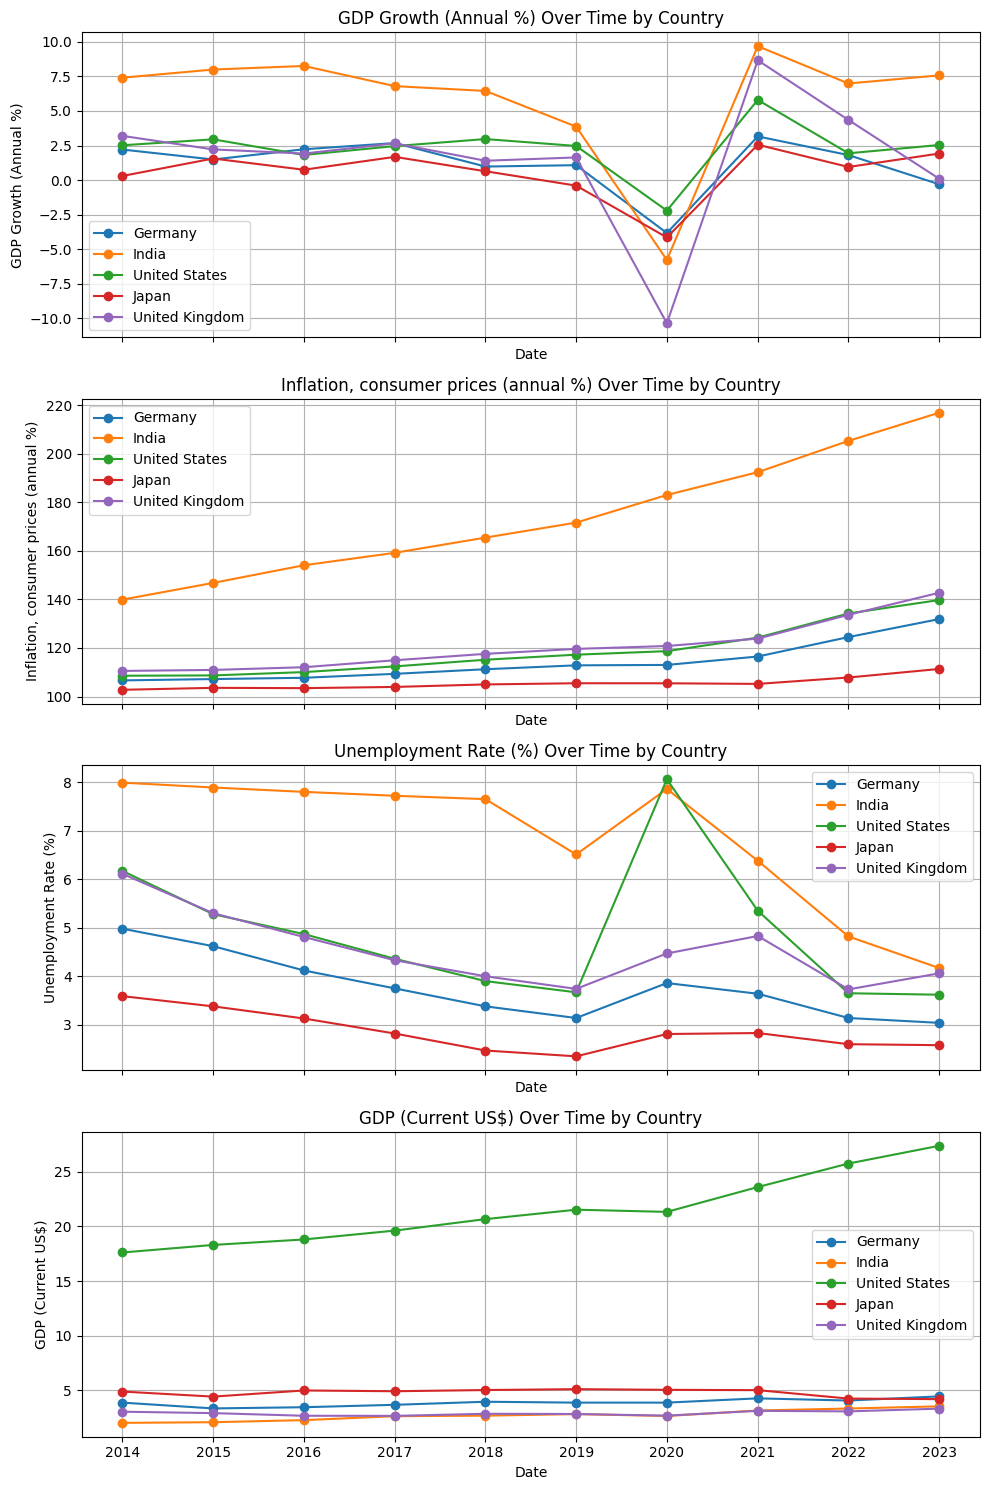

In [ ]:
import wbdata
import pandas as pd
from datetime import datetime

# Define the indicators you are interested in
indicators = {
    "NY.GDP.MKTP.CD": "GDP (Current US$)",
    "NY.GDP.MKTP.KD.ZG": "GDP Growth (Annual %)",
    "FP.CPI.TOTL": "Inflation, consumer prices (annual %)",
    "FR.INR.RINR": "Real Interest Rate (%)",
    "SL.UEM.TOTL.ZS": "Unemployment Rate (%)"
}

# Define the countries for which you want to fetch data
countries = ["USA", "DEU", "JPN", "GBR", "IND"]

# Define the date range for the data
start_date = datetime(2014, 1, 1)
end_date = datetime.today()

# Fetch the data using wbdata
df = wbdata.get_dataframe(indicators, country=countries)

# Extract 'date' and 'country' from the multi-index
df.reset_index(inplace=True)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the dataframe for the specified date range
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Sort by the latest date
df.sort_values(by='date', ascending=False, inplace=True)

# Round the GDP values to the nearest trillion (divide by 1e12 and round)
df['GDP (Current US$)'] = (df['GDP (Current US$)'] / 1e12).round(2)

# Round off other values to two decimal points
df[['GDP Growth (Annual %)', 'Inflation, consumer prices (annual %)',
    'Real Interest Rate (%)', 'Unemployment Rate (%)']] = df[['GDP Growth (Annual %)',
                                                             'Inflation, consumer prices (annual %)',
                                                             'Real Interest Rate (%)',
                                                             'Unemployment Rate (%)']].round(2)

df.drop(columns=['Real Interest Rate (%)'], inplace=True)
# Display the modified data with the country field
display(df)

# Optional: Save the modified data to a CSV file
#df.to_csv('modified_world_bank_data_with_country.csv', index=False)

import matplotlib.pyplot as plt

# Define the metrics to plot
metrics = ['GDP Growth (Annual %)', 'Inflation, consumer prices (annual %)',
           'Unemployment Rate (%)', 'GDP (Current US$)']

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15), sharex=True)

# Loop through each metric to plot
for ax, metric in zip(axes, metrics):
    # Plot each country for the current metric
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        ax.plot(country_data['date'], country_data[metric], marker='o', label=country)

    # Set title, labels, and grid
    ax.set_title(f'{metric} Over Time by Country')
    ax.set_xlabel('Date')
    ax.set_ylabel(metric)
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
import pandas_datareader.data as web
from datetime import datetime

# Define start and end date
start = datetime(2014, 1, 1)
end = datetime.now()

# Fetch GDP data from FRED
gdp_data = web.DataReader('GDP', 'fred', start, end)
print(gdp_data)

# Fetch Federal Funds Interest Rate from FRED
interest_rate_data = web.DataReader('FEDFUNDS', 'fred', start, end)
print(interest_rate_data)


                  GDP
DATE                 
2014-01-01  17197.738
2014-04-01  17518.508
2014-07-01  17804.228
2014-10-01  17912.079
2015-01-01  18063.529
2015-04-01  18279.784
2015-07-01  18401.626
2015-10-01  18435.137
2016-01-01  18525.933
2016-04-01  18711.702
2016-07-01  18892.639
2016-10-01  19089.379
2017-01-01  19280.084
2017-04-01  19438.643
2017-07-01  19692.595
2017-10-01  20037.088
2018-01-01  20328.553
2018-04-01  20580.912
2018-07-01  20798.730
2018-10-01  20917.867
2019-01-01  21104.133
2019-04-01  21384.775
2019-07-01  21694.282
2019-10-01  21902.390
2020-01-01  21706.513
2020-04-01  19913.143
2020-07-01  21647.640
2020-10-01  22024.502
2021-01-01  22600.185
2021-04-01  23292.362
2021-07-01  23828.973
2021-10-01  24654.603
2022-01-01  25029.116
2022-04-01  25544.273
2022-07-01  25994.639
2022-10-01  26408.405
2023-01-01  26813.601
2023-04-01  27063.012
2023-07-01  27610.128
2023-10-01  27956.998
2024-01-01  28269.174
2024-04-01  28652.337
            FEDFUNDS
DATE       

**#Probability of indices going up for consecutive days (1 day, 2 days, up to 7 days in a row)**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


    S&P 500    NASDAQ  Dow Jones  FTSE 100  Nikkei 225       DAX    Sensex
1  0.261047  0.252135   0.249907  0.249723    0.253058  0.259573  0.229627
2  0.136701  0.135958   0.132987  0.133975    0.130402  0.134807  0.132952
3  0.075437  0.073950   0.072464  0.071085    0.069243  0.069270  0.077363
4  0.034944  0.041636   0.040892  0.034444    0.034443  0.033911  0.044224
5  0.016735  0.023057   0.019710  0.018155    0.016462  0.017699  0.024027
6  0.008929  0.011533   0.012277  0.007784    0.010341  0.009222  0.016406
7  0.004466  0.007815   0.007071  0.004820    0.007280  0.006642  0.008397


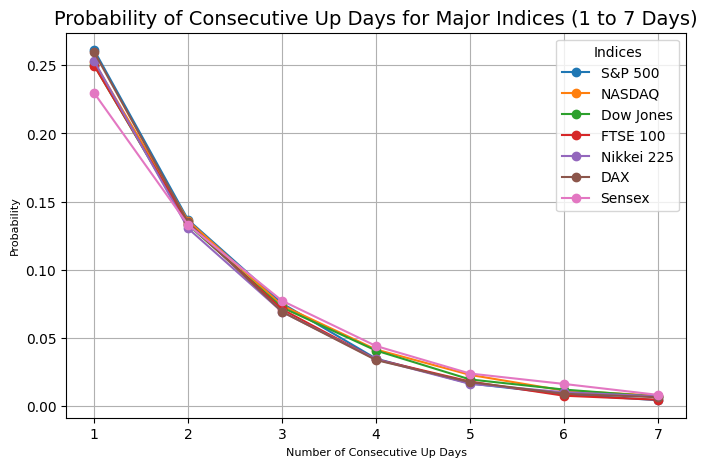

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Define ticker symbols for the indices
indices = {
    "S&P 500": "^GSPC",
    "NASDAQ": "^IXIC",
    "Dow Jones": "^DJI",
    "FTSE 100": "^FTSE",
    "Nikkei 225": "^N225",
    "DAX": "^GDAXI",
    "Sensex": "^BSESN"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data for probabilities
probability_data = {}

# Fetch and store daily closing prices for each index
for name, ticker in indices.items():
    # Fetch daily data from Yahoo Finance (last 10 years)
    data = yf.download(ticker, start="2014-01-01", end=today)

    # Calculate daily changes (whether the price went up or not)
    data['Daily Change'] = data['Close'].pct_change()
    data['Up Day'] = np.where(data['Daily Change'] > 0, 1, 0)  # 1 if price went up, else 0

    # Initialize a dictionary to hold counts of consecutive up days
    consecutive_up_days_count = {n: 0 for n in range(1, 8)}

    # Iterate through the data to count consecutive up days
    current_streak = 0
    for i in range(1, len(data)):
        if data['Up Day'].iloc[i] == 1:
            current_streak += 1
        else:
            current_streak = 0  # Reset streak if it's not an up day

        # For each streak, count it if it matches 1 to 7 consecutive days
        for n in range(1, 8):
            if current_streak == n:
                consecutive_up_days_count[n] += 1

    # Calculate the probability for each streak (dividing by total days minus n)
    total_days = len(data) - 1
    probabilities = {n: consecutive_up_days_count[n] / (total_days - n + 1) for n in range(1, 8)}

    # Store the probabilities in the dictionary
    probability_data[name] = probabilities

# Convert the probabilities data to a DataFrame for easier display
probability_df = pd.DataFrame(probability_data)

# Print the DataFrame to the console
print(probability_df)

# Visualization: Plotting the probabilities for each index
plt.figure(figsize=(8, 5))

# Create line plots for each index
for index in probability_df.columns:
    plt.plot(probability_df.index, probability_df[index], marker='o', label=index)

# Adding chart title and labels
plt.title('Probability of Consecutive Up Days for Major Indices (1 to 7 Days)', fontsize=14)
plt.xlabel('Number of Consecutive Up Days', fontsize=8)
plt.ylabel('Probability', fontsize=8)

# Show grid and legend
plt.grid(True)
plt.legend(title='Indices', loc='upper right')

# Show the plot
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


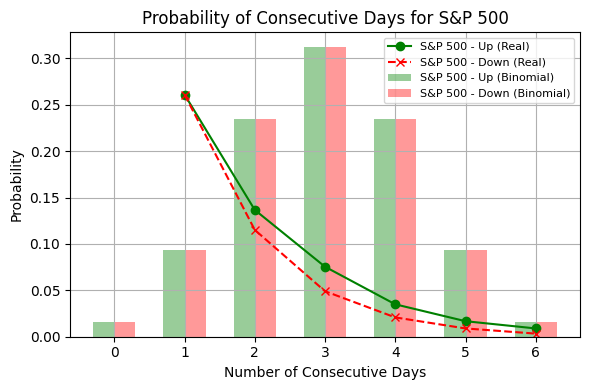

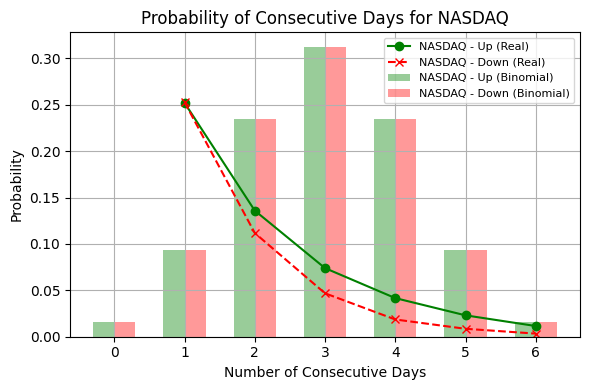

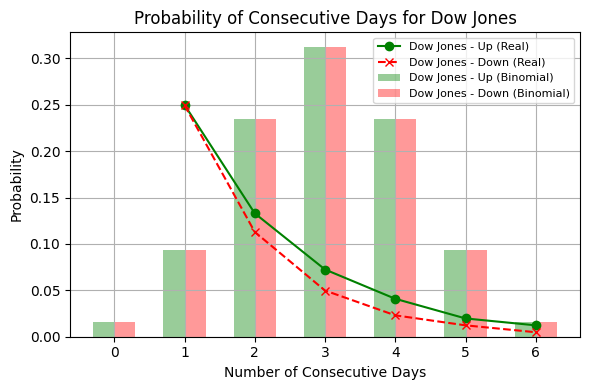

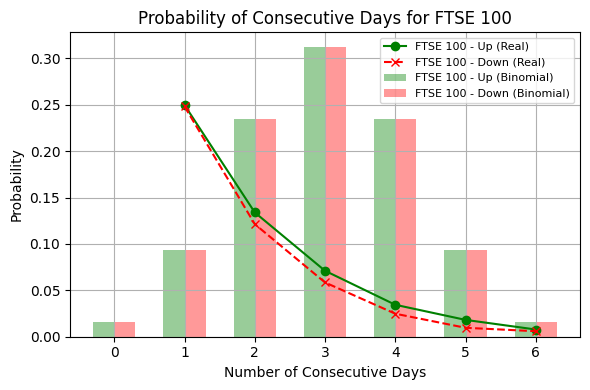

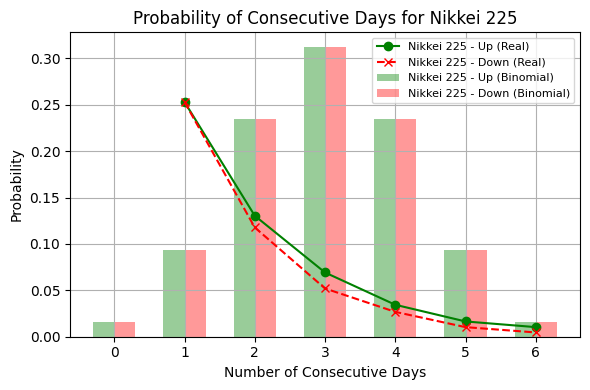

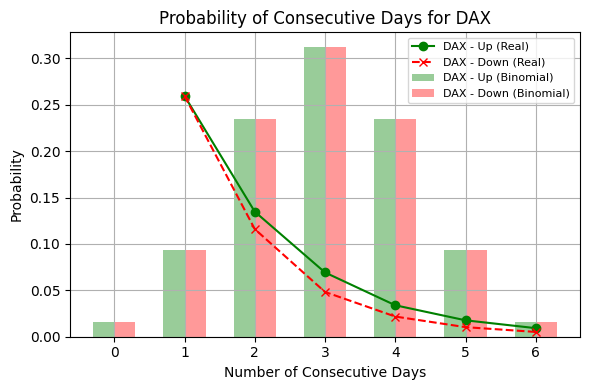

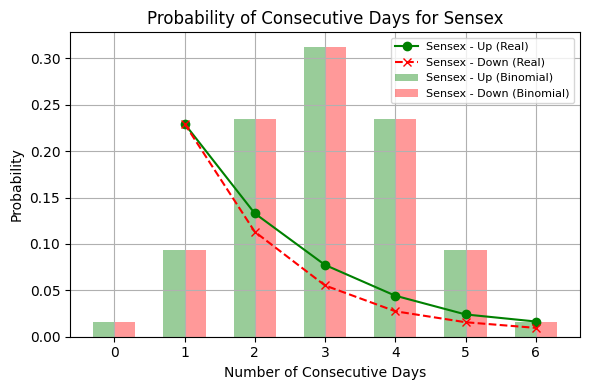

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import binom

# Define ticker symbols for the indices
indices = {
    "S&P 500": "^GSPC",
    "NASDAQ": "^IXIC",
    "Dow Jones": "^DJI",
    "FTSE 100": "^FTSE",
    "Nikkei 225": "^N225",
    "DAX": "^GDAXI",
    "Sensex": "^BSESN"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data for probabilities
up_prob_data = {}
down_prob_data = {}

# Fetch and store daily closing prices for each index
for name, ticker in indices.items():
    # Fetch daily data from Yahoo Finance (last 10 years)
    data = yf.download(ticker, start="2014-01-01", end=today)

    # Calculate daily changes (whether the price went up or not)
    data['Daily Change'] = data['Close'].pct_change()
    data['Up Day'] = np.where(data['Daily Change'] > 0, 1, 0)  # 1 if price went up
    data['Down Day'] = np.where(data['Daily Change'] < 0, 1, 0)  # 1 if price went down

    # Initialize dictionaries to hold counts of consecutive up/down days
    consecutive_up_days_count = {n: 0 for n in range(1, 7)}  # Up to 6 consecutive up days
    consecutive_down_days_count = {n: 0 for n in range(1, 7)}  # Up to 6 consecutive down days

    # Iterate through the data to count consecutive up/down days
    current_up_streak = 0
    current_down_streak = 0

    for i in range(1, len(data)):
        if data['Up Day'].iloc[i] == 1:
            current_up_streak += 1
            current_down_streak = 0  # Reset down streak
        elif data['Down Day'].iloc[i] == 1:
            current_down_streak += 1
            current_up_streak = 0  # Reset up streak
        else:
            current_up_streak = 0
            current_down_streak = 0

        # Count consecutive up days
        for n in range(1, 7):
            if current_up_streak == n:
                consecutive_up_days_count[n] += 1

        # Count consecutive down days
        for n in range(1, 7):
            if current_down_streak == n:
                consecutive_down_days_count[n] += 1

    # Calculate the probability for each streak (dividing by total days minus n)
    total_days = len(data) - 1
    up_probabilities = {n: consecutive_up_days_count[n] / (total_days - n + 1) for n in range(1, 7)}
    down_probabilities = {n: consecutive_down_days_count[n] / (total_days - n + 1) for n in range(1, 7)}

    # Store the probabilities in the respective dictionaries
    up_prob_data[name] = up_probabilities
    down_prob_data[name] = down_probabilities

# Convert the probabilities data to DataFrames for easier display
up_prob_df = pd.DataFrame(up_prob_data)
down_prob_df = pd.DataFrame(down_prob_data)

# Binomial Graph Parameters
n = 6  # Number of trials (consecutive days)
p = 0.5  # Assume a fair 50% chance of going up or down each day
x = np.arange(0, n + 1)
binom_up_pmf = binom.pmf(x, n, p)
binom_down_pmf = binom.pmf(x, n, p)

# Plot each index separately
for index in indices.keys():
    plt.figure(figsize=(6, 4))  # Smaller chart size

    # Plot real-world probabilities (Up Days)
    plt.plot(up_prob_df.index, up_prob_df[index], marker='o', color='green', label=f'{index} - Up (Real)')

    # Plot real-world probabilities (Down Days)
    plt.plot(down_prob_df.index, down_prob_df[index], marker='x', linestyle='--', color='red', label=f'{index} - Down (Real)')

    # Plot binomial distribution (Up Days)
    plt.bar(x - 0.15, binom_up_pmf, width=0.3, color='green', alpha=0.4, label=f'{index} - Up (Binomial)')

    # Plot binomial distribution (Down Days)
    plt.bar(x + 0.15, binom_down_pmf, width=0.3, color='red', alpha=0.4, label=f'{index} - Down (Binomial)')

    # Adding chart title and labels
    plt.title(f'Probability of Consecutive Days for {index}', fontsize=12)
    plt.xlabel('Number of Consecutive Days', fontsize=10)
    plt.ylabel('Probability', fontsize=10)

    # Show grid and legend
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=8)

    # Display the plot
    plt.tight_layout()
    plt.show()


#HMM Model

[*********************100%***********************]  1 of 1 completed


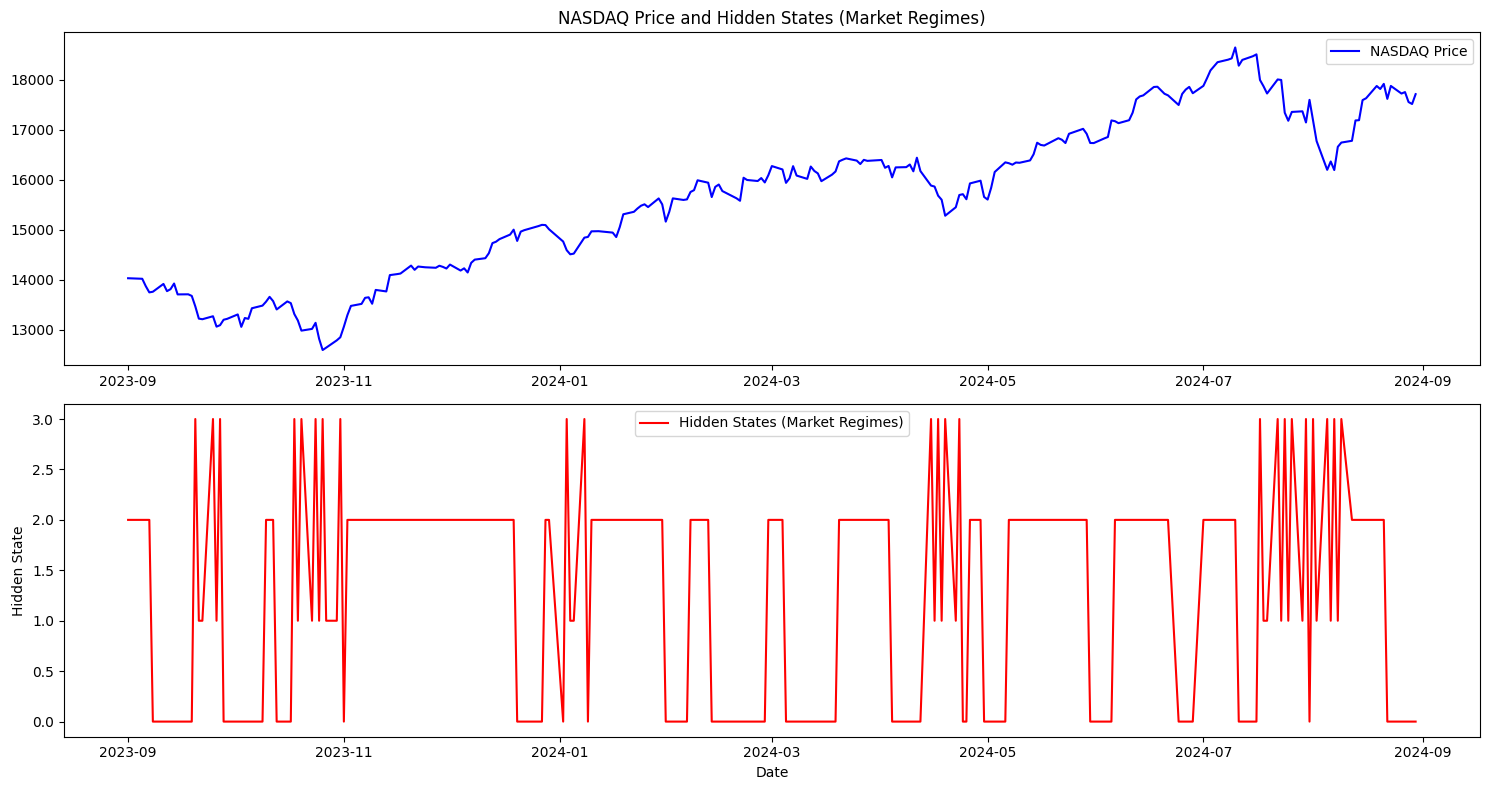

Transition Matrix:
 [[7.94803497e-01 4.76121404e-05 1.31996841e-01 7.31520498e-02]
 [1.21179488e-08 2.89882402e-01 7.85684241e-17 7.10117586e-01]
 [1.16769670e-01 1.31367180e-11 8.83229055e-01 1.27533506e-06]
 [2.41402387e-01 7.02310708e-01 4.92764568e-02 7.01044800e-03]]
Means of each hidden state:
 [[-0.15296565  0.35548432]
 [-1.59755972  0.96234209]
 [ 0.68372935 -0.64804762]
 [-1.42931475  1.05402981]]
Covariances of each hidden state:
 [[[0.20912866 0.11404722]
  [0.11404722 0.34695282]]

 [[0.12997968 0.11478177]
  [0.11478177 1.53005218]]

 [[0.47630648 0.2544723 ]
  [0.2544723  0.48779895]]

 [[0.67917252 0.04544666]
  [0.04544666 1.05744715]]]


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# 1. Fetch NASDAQ stock price data for the last year
ticker = "^IXIC"  # NASDAQ index
data = yf.download(ticker, start="2023-09-01", end="2024-09-01")

# 2. Preprocess data: Calculate daily returns and volatility
data['Returns'] = data['Adj Close'].pct_change().fillna(0)
data['Volatility'] = data['Returns'].rolling(window=5).std().fillna(0)  # 5-day rolling volatility

# 3. Smooth the returns to reduce noise
data['Smoothed Returns'] = data['Returns'].rolling(window=5).mean().fillna(0)

# 4. Scale the data for better performance in HMM
scaler = StandardScaler()
observations = scaler.fit_transform(data[['Smoothed Returns', 'Volatility']])

# 5. Fit a Hidden Markov Model (HMM) to the data
model = hmm.GaussianHMM(n_components=4, covariance_type="full", n_iter=1000)
model.fit(observations)

# 6. Predict hidden states (market regimes) for the entire dataset
hidden_states = model.predict(observations)

# Add hidden states to the dataframe
data['Hidden State'] = hidden_states

# 7. Visualize the hidden states and the stock prices
plt.figure(figsize=(15, 8))

# Plot the adjusted close price
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label="NASDAQ Price", color='blue')
plt.title('NASDAQ Price and Hidden States (Market Regimes)')
plt.legend()

# Plot the hidden states
plt.subplot(2, 1, 2)
plt.plot(data.index, hidden_states, label="Hidden States (Market Regimes)", color='red')
plt.ylabel("Hidden State")
plt.xlabel("Date")
plt.legend()

plt.tight_layout()
plt.show()

# 8. Print the parameters of the HMM
print("Transition Matrix:\n", model.transmat_)
print("Means of each hidden state:\n", model.means_)
print("Covariances of each hidden state:\n", model.covars_)


In [ ]:
# Note: This is for big data exploratory purpose only!